In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE,ADASYN,BorderlineSMOTE,SVMSMOTE,RandomOverSampler  
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score,auc, roc_auc_score, accuracy_score,roc_curve,average_precision_score, classification_report,precision_recall_curve
from collections import Counter
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv',encoding="utf-8",low_memory=False )
print("The shape of :", data.shape)

The shape of : (284807, 31)


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Good No Null Values!
data.isnull().sum().max()

0

In [6]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

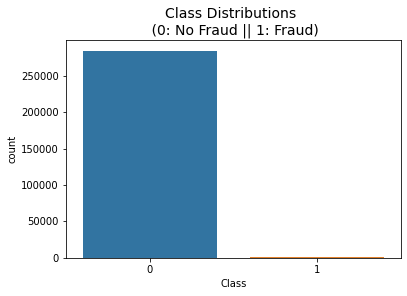

In [7]:
sns.countplot('Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
new_data=pd.concat([data]).drop_duplicates(keep=False)

In [10]:
new_data['Class'].value_counts()

0    282493
1       460
Name: Class, dtype: int64

In [11]:
new_data.reset_index()

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282948,284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
282949,284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
282950,284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
282951,284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
dataFalse=new_data[new_data['Class']==1]

In [13]:
dataTrue=new_data[new_data['Class']==0]

In [14]:
df_split = np.array_split(dataTrue, 5)

In [15]:
df1=df_split[0]
X1=pd.concat([df1, dataFalse])
Y1 = X1[['Class']]
X1 = X1.drop('Class', axis=1)


In [16]:
df2=df_split[1]
X2=pd.concat([df2, dataFalse])
Y2 = X2['Class']
X2 = X2.drop('Class', axis=1)


In [17]:
df3=df_split[2]
X3=pd.concat([df3, dataFalse])
Y3 = X3['Class']
X3 = X3.drop('Class', axis=1)

In [18]:
df4=df_split[3]
X4=pd.concat([df4, dataFalse])
Y4 = X4['Class']
X4 = X4.drop('Class', axis=1)

In [19]:
df5=df_split[4]
X5=pd.concat([df5, dataFalse])
Y5 = X5['Class']
X5 = X5.drop('Class', axis=1)

In [20]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

scaler = StandardScaler()

#data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
#data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

#data.drop(['Time','Amount'], axis=1, inplace=True)

In [21]:
X_smote, y_smote = SMOTE().fit_resample(X1, Y1)
print('SMOTE Label Distribution: {}'.format(Counter(y_smote)))
smote_all= pd.concat([X_smote, y_smote], axis=1)
smote_all.shape

SMOTE Label Distribution: Counter({'Class': 1})


(112998, 31)

In [22]:
X_adasyn,y_adasyn=ADASYN().fit_resample(X2,Y2)
print('ADASYN Label Distribution: {}'.format(Counter(y_adasyn)))
adasyn_all= pd.concat([X_adasyn, y_adasyn], axis=1)
adasyn_all.shape

ADASYN Label Distribution: Counter({1: 56500, 0: 56499})


(112999, 31)

In [23]:
X_svmsmote,y_svmsmote=SVMSMOTE().fit_resample(X3,Y3)
print('SVMSMOTE Label Distribution: {}'.format(Counter(y_svmsmote)))
svmsmote_all= pd.concat([X_svmsmote, y_svmsmote], axis=1)
svmsmote_all.shape

SVMSMOTE Label Distribution: Counter({0: 56499, 1: 56499})


(112998, 31)

In [24]:
X_borderline,y_borderline=BorderlineSMOTE().fit_resample(X4,Y4)
print('BorderlineSMOTE Label Distribution: {}'.format(Counter(y_borderline)))
borderline_all= pd.concat([X_borderline, y_borderline], axis=1)
borderline_all.shape

BorderlineSMOTE Label Distribution: Counter({0: 56498, 1: 56498})


(112996, 31)

In [25]:
X_oversample,y_oversample=RandomOverSampler().fit_resample(X5,Y5)
print('Oversampler Label Distribution: {}'.format(Counter(y_oversample)))
oversample_all= pd.concat([X_oversample, y_oversample], axis=1)
oversample_all.shape

Oversampler Label Distribution: Counter({0: 56498, 1: 56498})


(112996, 31)

In [26]:
final_data= pd.concat([smote_all,adasyn_all,svmsmote_all,borderline_all,oversample_all], axis=0)

In [27]:
final_data.shape

(564987, 31)

In [28]:
X = final_data.drop('Class', axis=1)
Y = final_data['Class']
X = scaler.fit_transform(X)
Y.value_counts()

1    282494
0    282493
Name: Class, dtype: int64

In [29]:
X = scaler.fit_transform(X)
Y.value_counts()

1    282494
0    282493
Name: Class, dtype: int64

### Splitting the dataset :

In [30]:
# Split train into train-test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
print("The shape of : x_test,y_test,x_train,y_train ",X_test.shape,y_test.shape,X_train.shape,y_train.shape)

The shape of : x_test,y_test,x_train,y_train  (112998, 30) (112998,) (451989, 30) (451989,)


###LogisiticRegression Model :

              precision    recall  f1-score   support

           0   0.937164  0.982682  0.959383     56414
           1   0.981855  0.934310  0.957493     56584

    accuracy                       0.958459    112998
   macro avg   0.959510  0.958496  0.958438    112998
weighted avg   0.959543  0.958459  0.958437    112998

0.9583042950160292
0.9584594417600312
Specificity :  0.9343100523116076


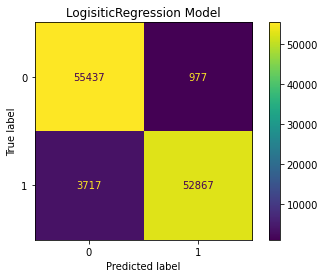

In [32]:
# Train the LogisiticRegression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)

# Check the model performance
print(classification_report(y_test, y_pred1,digits=6))

# Check scores
print (logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

# Check specificity
from sklearn import metrics
specificity = metrics.recall_score(y_test, y_pred1, pos_label=1)
print('Specificity : ', specificity)

#Confusion Matrix visualization
plot_confusion_matrix(logreg, X_test, y_test)  
plt.title('LogisiticRegression Model')
plt.show()

Sans compétences : ROC AUC=0.500
Régression Logistique : ROC AUC=0.985


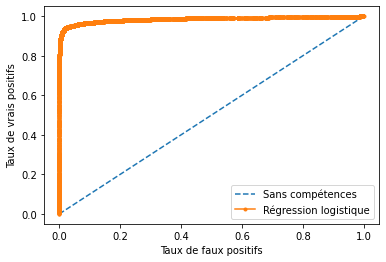

In [33]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Sans compétences : ROC AUC=%.3f' % (ns_auc))
print('Régression Logistique : ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sans compétences')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Régression logistique')
# axis labels
pyplot.xlabel('Taux de faux positifs')
pyplot.ylabel('Taux de vrais positifs')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

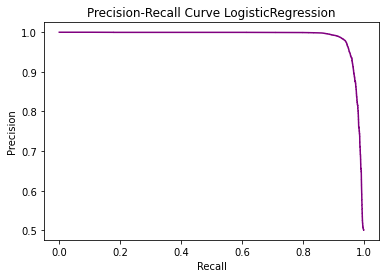

In [34]:
#use logistic regression model to make predictions
y_score1 = logreg.predict_proba(X_test)[:, 1]

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score1)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve LogisticRegression')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

###DecisionTree Model :

              precision    recall  f1-score   support

           0   0.926925  0.970220  0.948079     56414
           1   0.968859  0.923742  0.945763     56584

    accuracy                       0.946946    112998
   macro avg   0.947892  0.946981  0.946921    112998
weighted avg   0.947924  0.946946  0.946919    112998

0.9473659757206481
0.9469459636453742
Specificity :  0.9237416937650219


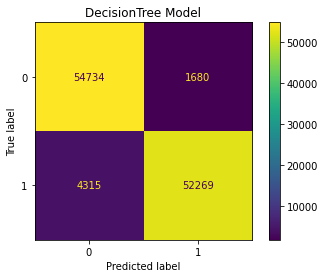

In [35]:
# Train Decision Tree Classifer
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
y_pred2 = clf.predict(X_test)

# Check the model performance
print(classification_report(y_test, y_pred2,digits=6))

# Check scores
print (clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

# Check specificity
from sklearn import metrics
specificity = metrics.recall_score(y_test, y_pred2, pos_label=1)
print('Specificity : ', specificity)

#Confusion Matrix visualization
plot_confusion_matrix(clf, X_test, y_test)  
plt.title('DecisionTree Model')
plt.show()

Sans compétences : ROC AUC=0.500
DecisionTree : ROC AUC=0.998


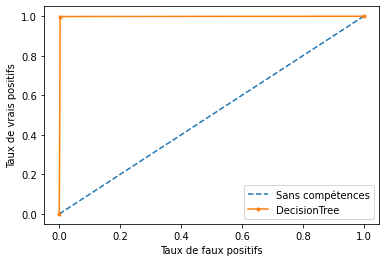

In [36]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# predict probabilities
lr_probs1 = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs1[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs1)
# summarize scores
print('Sans compétences : ROC AUC=%.3f' % (ns_auc))
print('DecisionTree : ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs1)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sans compétences')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='DecisionTree')
# axis labels
pyplot.xlabel('Taux de faux positifs')
pyplot.ylabel('Taux de vrais positifs')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

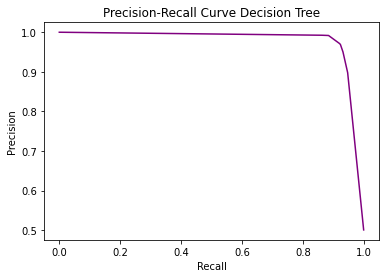

In [37]:
#use Decision Tree model to make predictions
y_score2 = clf.predict_proba(X_test)[:, 1]

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score2)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve Decision Tree')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

###KNearest Model :


              precision    recall  f1-score   support

           0   1.000000  0.998954  0.999477     56414
           1   0.998958  1.000000  0.999479     56584

    accuracy                       0.999478    112998
   macro avg   0.999479  0.999477  0.999478    112998
weighted avg   0.999478  0.999478  0.999478    112998

0.9997566312454507
0.9994778668649003
Specificity :  1.0


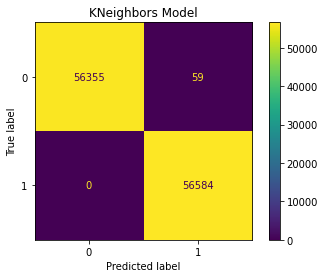

In [38]:
# Train KNeighbors Classifer
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred4 = knn.predict(X_test)

# Check the model performance
print(classification_report(y_test, y_pred4,digits=6))

# Check scores
print (knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

# Check specificity
from sklearn import metrics
specificity = metrics.recall_score(y_test, y_pred4, pos_label=1)
print('Specificity : ', specificity)

#Confusion Matrix visualization
plot_confusion_matrix(knn, X_test, y_test)  
plt.title('KNeighbors Model')
plt.show()

Sans compétences : ROC AUC=0.500
KNearest : ROC AUC=1.000


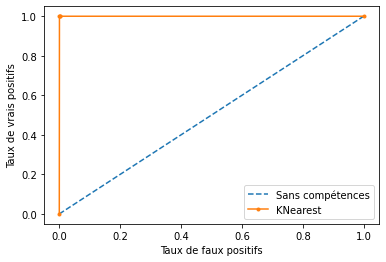

In [39]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Sans compétences : ROC AUC=%.3f' % (ns_auc))
print('KNearest : ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sans compétences')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='KNearest')
# axis labels
pyplot.xlabel('Taux de faux positifs')
pyplot.ylabel('Taux de vrais positifs')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

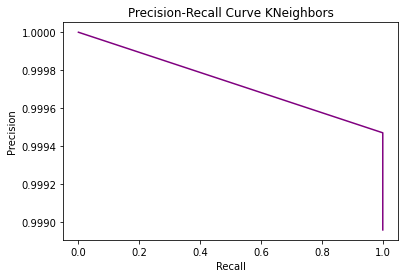

In [40]:
#use KNeighbors model to make predictions
y_score3 = knn.predict_proba(X_test)[:, 1]

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score3)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve KNeighbors')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

###RandomForest Model :


              precision    recall  f1-score   support

           0   0.999876  0.999805  0.999840     56414
           1   0.999806  0.999876  0.999841     56584

    accuracy                       0.999841    112998
   macro avg   0.999841  0.999841  0.999841    112998
weighted avg   0.999841  0.999841  0.999841    112998

1.0
0.9998407051452238
Specificity :  0.9998762901173477


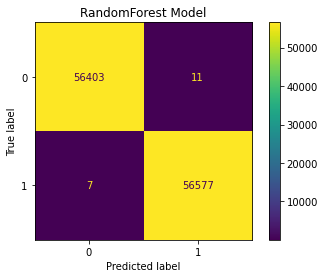

In [41]:
# Train RandomForest Classifer
rf=RandomForestClassifier(random_state=123)
rf.fit(X_train,y_train)
y_pred3=rf.predict(X_test)

# Check the model performance
print(classification_report(y_test, y_pred3,digits=6))

# Check scores
print (rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

# Check specificity
from sklearn import metrics
specificity = metrics.recall_score(y_test, y_pred3, pos_label=1)
print('Specificity : ', specificity)

#Confusion Matrix visualization
plot_confusion_matrix(rf, X_test, y_test)  
plt.title('RandomForest Model')
plt.show()